In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define a consistent project folder inside Google Drive
project_path = "/content/drive/MyDrive/Heart_Disease_Project"
data_path = os.path.join(project_path, "data")

# Create the data folder if it doesn’t exist
os.makedirs(data_path, exist_ok=True)

print("Project path set to:", project_path)
print("Data path set to:", data_path)


Mounted at /content/drive
Project path set to: /content/drive/MyDrive/Heart_Disease_Project
Data path set to: /content/drive/MyDrive/Heart_Disease_Project/data


In [8]:
df = pd.read_csv(os.path.join(data_path, "cleaned_heart.csv"))


In [9]:
X = df.drop("target", axis=1)
y = df["target"]

In [10]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [11]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [12]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components (95% variance): {optimal_components}")


Optimal number of components (95% variance): 12


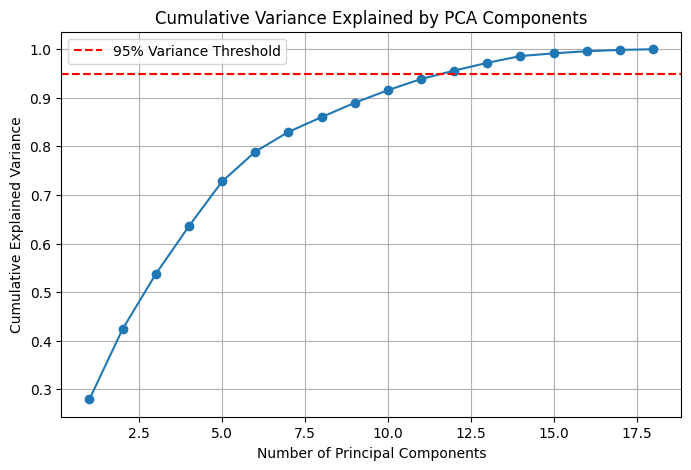

In [13]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA Components")
plt.legend()
plt.grid()
plt.show()

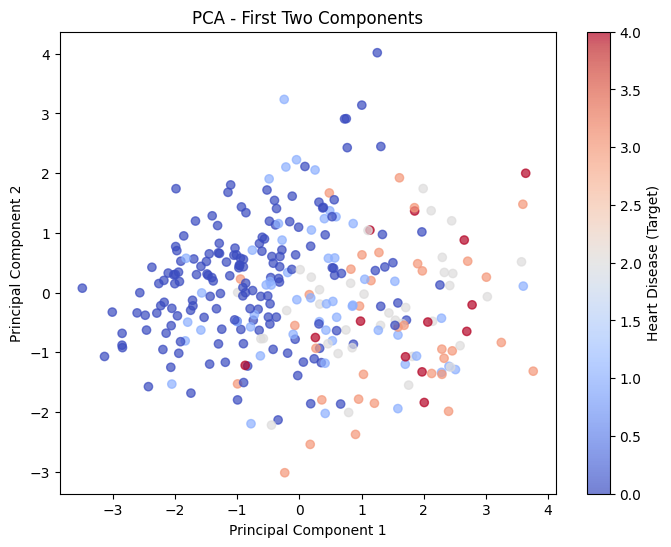

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components")
plt.colorbar(label="Heart Disease (Target)")
plt.show()

In [15]:
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X)

pca_df = pd.DataFrame(X_pca_final, columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df["target"] = y

pca_df.to_csv(os.path.join(data_path, "pca_heart.csv"), index=False)
print("PCA-transformed dataset saved at", os.path.join(data_path, "pca_heart.csv"))

PCA-transformed dataset saved at /content/drive/MyDrive/Heart_Disease_Project/data/pca_heart.csv
